In [1]:
import numpy as np
import pandas as pd
from keras.callbacks import TensorBoard
from keras.models import Sequential, Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D, Input, BatchNormalization, Activation
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
import pandas as pd
import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
train = pd.read_csv('emnist1/emnist-letters-train.csv', header=None)
test = pd.read_csv('emnist1/emnist-letters-test.csv', header=None)
train_data = train.iloc[:, 1:]
train_labels = train.iloc[:, 0]
test_data = test.iloc[:, 1:]
test_labels = test.iloc[:, 0]
train_data = train_data.values
train_labels = train_labels.values
test_data = test_data.values
test_labels = test_labels.values

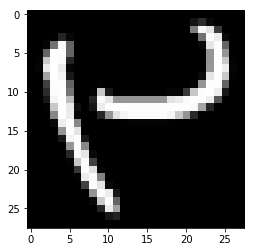

10


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
i=10
plt.imshow(train_data[i].reshape([28, 28]), cmap='Greys_r')
plt.show()
print(train_labels[i])

In [5]:
def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image.reshape([28 * 28])
train_data = np.apply_along_axis(rotate, 1, train_data)
test_data = np.apply_along_axis(rotate, 1, test_data)

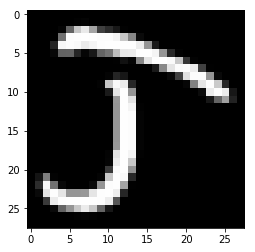

10


In [6]:
i=10
plt.imshow(train_data[i].reshape([28, 28]), cmap='Greys_r')
plt.show()
print(train_labels[i])

In [7]:
train_data = train_data.reshape(train_data.shape[0], 28, 28,1).astype('float32')
test_data = test_data.reshape(test_data.shape[0], 28, 28,1).astype('float32')
train_labels=train_labels.reshape(train_labels.shape[0],1).astype('float32')
test_labels=test_labels.reshape(test_labels.shape[0],1).astype('float32')
del train, test
print(train_labels.shape)
print(train_data.shape)
train_labels=train_labels-1
test_labels=test_labels-1

(88800, 1)
(88800, 28, 28, 1)


In [8]:
train_data = train_data/255
test_data = test_data/255

# Encode Categorical Integer Labels Using a One-Hot Scheme
# One-hot encode the labels
train_labels = np_utils.to_categorical(train_labels, num_classes = 26)
test_labels = np_utils.to_categorical(test_labels, num_classes = 26)

In [9]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(26, activation='softmax'))

In [ ]:
# Comple the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels,
          batch_size=128,
          epochs=5,
          verbose=1,
          validation_data=(test_data, test_labels))
# Save the model weights for future reference
model.save('emnist_cnn_model.h5')
model = load_model('emnist_cnn_model.h5')

# Evaluate the model using Accuracy and Loss
score = model.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [11]:
from keras.models import load_model
score = model.evaluate(test_data, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2542813640344586
Test accuracy: 0.9145945945945946
